# Sampling and Expectation Values

In this notbook we will work on the bonus questions of screening Task 1:
- How would you sample from the final states in the statevector or tensor representations? 
- How about computing exact expectation values in the form <Ψ| Op |Ψ>?

### Table of content

- [Packages](#0)
- [1. Sampling from Final States](#1)
- [2. Expectation Values](#2)

<a name='0'></a>
### Packages

Before we begin, we will add the src directory in sys.paths so that we can import the code from it. 

In [1]:
import sys
import os

# Add the src directory to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

Importing all the necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from gates import Gates
from matrix_simulation import NaiveQuantumCircuit
from tensor_simulation import AdvanceQuantumCircuit

# Set random seed for reproducibility
np.random.seed(1)

<a name='1'></a>
### 1. Sampling from Final States

For this we will use `measure()` function of matrix and tensor simulators defined in their respective class definitions. The function squares the amplitudes of the states to get their respective probabilities. Based on those probabilities, we randomly select a state.

In the following function `sample_final_states(circuit, num_samples)` we will use `measure()` num_samples times. We will collect the frequnceis of each states and later plot them in bar graph. 

In [3]:
def sample_final_states(circuit, num_samples):
    results = []
    for _ in range(num_samples):
        result = circuit.measure()
        results.append(result)
    
    # Calculate frequencies of each state
    unique, counts = np.unique(results, return_counts=True)
    frequencies = dict(zip(unique, counts))
    return frequencies


The following function `plot_final_state(matrix_samples, tensor_samples)` will take the frequencies of final states, and then plot it in a bar graph. 

In [4]:
def plot_final_state(matrix_samples, tensor_samples):
    _, axes = plt.subplots(1, 2, figsize=(14, 6))
    axes[0].bar(matrix_samples.keys(), matrix_samples.values(), color="skyblue")
    axes[0].set_title("Matrix Simulator Sampling Results")
    axes[0].set_xlabel("State")
    axes[0].set_ylabel("Frequency")

    axes[1].bar(tensor_samples.keys(), tensor_samples.values(), color="salmon")
    axes[1].set_title("Tensor Simulator Sampling Results")
    axes[1].set_xlabel("State")
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

##### Bell's state

Now let's measure the final state of Bell's state. For |Φ+>, we have 50-50 probability of |00> and |11>. Let see whether our results get close to this.

Here we will measure the state 5000 times and then plot the results.

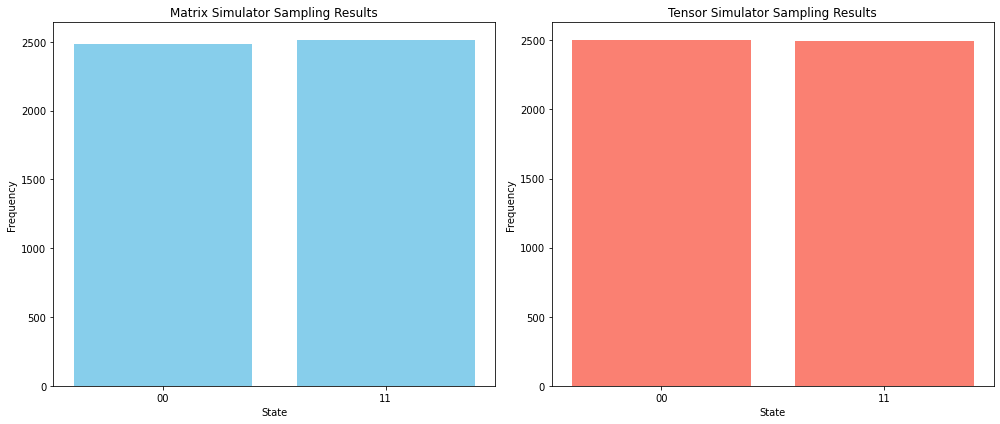

In [5]:
# Parameters
num_qubits = 2
num_samples = 5000

# Initialize circuits
naive_circuit = NaiveQuantumCircuit(num_qubits)
advance_circuit = AdvanceQuantumCircuit(num_qubits)

# Create Bell's state (|Φ+>)
naive_circuit.apply_single_qubit_gate(Gates.H,0)
naive_circuit.apply_cnot_gate(0,1)
advance_circuit.apply_single_qubit_gate(Gates.H,0)
advance_circuit.apply_cnot_gate(0,1)

# Sample from the final states for both simulators
matrix_samples = sample_final_states(naive_circuit, num_samples)
tensor_samples = sample_final_states(advance_circuit, num_samples)

# Plotting the sampling results
plot_final_state(matrix_samples, tensor_samples)

As you can see here, for both simulators we have almost 50-50 chances of |00> and |11> states.

Now let's check for |ψ+> were we have 50-50 chance of |01> and |01>

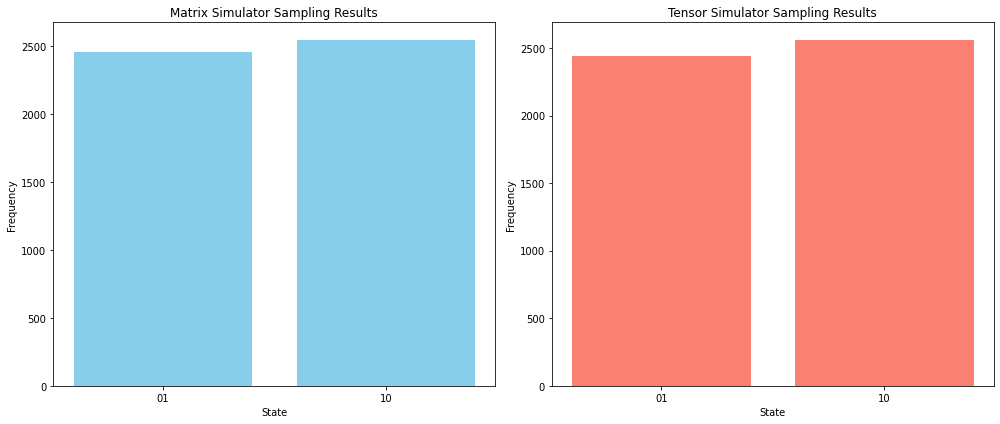

In [6]:
# Parameters
num_qubits = 2
num_samples = 5000

# Initialize circuits
naive_circuit = NaiveQuantumCircuit(num_qubits)
advance_circuit = AdvanceQuantumCircuit(num_qubits)

# Create Bell's state (|ψ+>)
naive_circuit.apply_single_qubit_gate(Gates.X, 1)
naive_circuit.apply_single_qubit_gate(Gates.H,0)
naive_circuit.apply_cnot_gate(0,1)
advance_circuit.apply_single_qubit_gate(Gates.X, 1)
advance_circuit.apply_single_qubit_gate(Gates.H,0)
advance_circuit.apply_cnot_gate(0,1)

# Sample from the final states for both simulators
matrix_samples = sample_final_states(naive_circuit, num_samples)
tensor_samples = sample_final_states(advance_circuit, num_samples)

# Plotting the sampling results
plot_final_state(matrix_samples, tensor_samples)

From the above diagrams, we can say that our measurement works as expected.

##### 3-Qubit Circuit with Hadamard Gates 

Now let's take measurement of a circuit with 3 qubits, each qubit applied with Hadamard gate. This circuit will have equal probabilities of the states:

|000>, |001>, |010>, |011>, |100>, |101>, |1010>, |111>

We will be measuring for 5000 times. So the circuit must output each of the above state close to 5000/8 = **625** times, after the measurments are performed. 

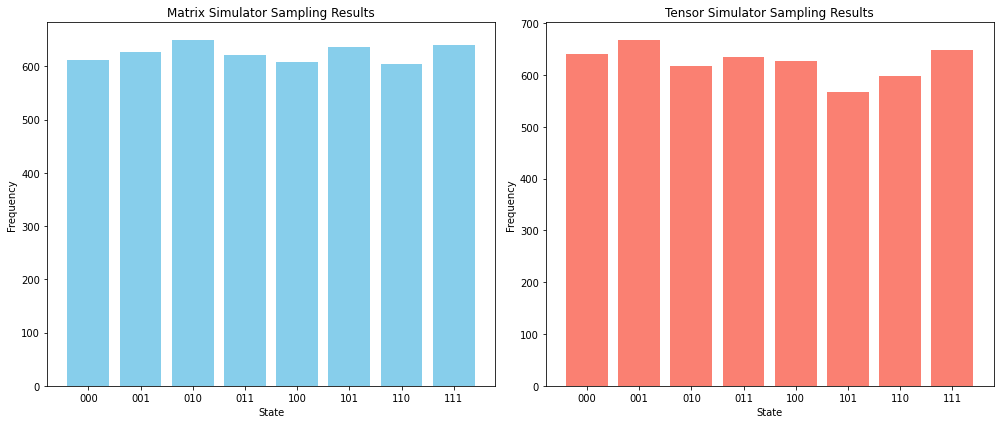

In [7]:
# Parameters
num_qubits = 3
num_samples = 5000

# Initialize circuits
naive_circuit = NaiveQuantumCircuit(num_qubits)
advance_circuit = AdvanceQuantumCircuit(num_qubits)

# Apply H gates to each qubit
for qubit in range(num_qubits):
    naive_circuit.apply_single_qubit_gate(Gates.H, qubit)
    advance_circuit.apply_single_qubit_gate(Gates.H, qubit)

# Sample from the final states for both simulators
matrix_samples = sample_final_states(naive_circuit, num_samples)
tensor_samples = sample_final_states(advance_circuit, num_samples)

# Plotting the sampling results
plot_final_state(matrix_samples, tensor_samples)

As you can see above, we got the results close to our estimations.

<a name='2'></a>
### 2. Expectation Values

For this we will use `expectation_value(gate)` function of matrix and tensor simulators defined in their respective class definitions.

The function finds the expectation value by performing ⟨Ψ|Op|Ψ⟩:
- Expand the single-qubit gate to the operator.
    Suppose we want to find expectation value for X gate, and it is a sytem of 3 qubits, then we will takes the gates kronecker product with itself 3 times

    Op = X⊗X⊗X

- Then we will apply the operator to the *Ket* state:

    Op|Ψ⟩ = X⊗X⊗X|Ψ⟩

- Then we will apply *Bra* of the state to it:

    ⟨Ψ|Op|Ψ⟩ = ⟨Ψ|X⊗X⊗X|Ψ⟩



In the following function `expectation_values_of_XYZ(matrix_circuit, tensor_circuit)` we will use `expectation_value(gate)` passing Pauli-X, Pauli-Y, and Pauli-Z gates as paramters one by one.

In [8]:
def expectation_values_of_XYZ(matrix_circuit, tensor_circuit):
    # Define a dictionary to store results
    expectation_results = {
        "Matrix Simulator": {},
        "Tensor Simulator": {}
    }

    # Compute expectation values for Pauli-X, Pauli-Y, and Pauli-Z gates
    operators = {"X": Gates.X, "Y": Gates.Y, "Z": Gates.Z}

    for name, op in operators.items():
        # Matrix Simulator Expectation Values
        expectation_results["Matrix Simulator"][name] = matrix_circuit.expectation_value(op)
        
        # Tensor Simulator Expectation Values
        expectation_results["Tensor Simulator"][name] = tensor_circuit.expectation_value(op)
        
    return expectation_results

##### Bell's State

In [14]:
# Initialize circuits
naive_circuit = NaiveQuantumCircuit(2)
advance_circuit = AdvanceQuantumCircuit(2)

# # Apply gates to create bell's state
naive_circuit.apply_single_qubit_gate(Gates.H, 0)
naive_circuit.apply_cnot_gate(0, 1)
advance_circuit.apply_single_qubit_gate(Gates.H, 0)
advance_circuit.apply_cnot_gate(0, 1)

# Compute the expectation values
expectation_results = expectation_values_of_XYZ(naive_circuit, advance_circuit)

print("Expected values for Matirx (Naive) Simulator: ")
print(expectation_results["Matrix Simulator"])
print("Expected values for Tensor (Advance) Simulator: ")
print(expectation_results["Tensor Simulator"])

Expected values for Matirx (Naive) Simulator: 
{'X': 1.0, 'Y': -1.0, 'Z': 1.0}
Expected values for Tensor (Advance) Simulator: 
{'X': 1.0, 'Y': -1.0, 'Z': 1.0}


Let's check this result.

**For X:**
- We have X gate.
$$
X = 
\begin{bmatrix} 
0 & 1 \\
1 & 0 \\
\end{bmatrix}
\quad
$$

- As we have 2-qubit system, we will check expectation value of X for both the qubits. We will expand it.

$$
X⊗X = 
\begin{bmatrix} 
0 & 1 \\
1 & 0 \\
\end{bmatrix}
⊗
\begin{bmatrix} 
0 & 1 \\
1 & 0 \\
\end{bmatrix}
\quad
$$

$$
Op = X⊗X = 
\begin{bmatrix} 
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
\end{bmatrix}
\quad
$$

- Now we will apply this operator to Ket of bell's state

$$
Op|ψ> = X⊗X|ψ> = 
\begin{bmatrix} 
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix} 
1/√2 \\
0 \\
0 \\
1/√2 \\
\end{bmatrix}
\quad
$$

$$
Op|ψ> = 
\begin{bmatrix} 
1/√2 \\
0 \\
0 \\
1/√2 \\
\end{bmatrix}
\quad
$$

- Finally we will apply Bra of bell's state to this Op|ψ>
$$
<ψ|Op|ψ> = 
\begin{bmatrix} 
1/√2 & 0 & 0 & 1/√2 \\
\end{bmatrix}
\begin{bmatrix} 
1/√2 \\
0 \\
0 \\
1/√2 \\
\end{bmatrix}
\quad
$$

$$
<Op> = <ψ|Op|ψ> = 1/2 + 0 + 0 + 1/2
$$

$$
<Op> = 1
$$

**For Y:**
- We have Y gate.
$$
Y = 
\begin{bmatrix} 
0 & -i \\
i & 0 \\
\end{bmatrix}
\quad
$$

- As we have 2-qubit system, we will check expectation value of Y for both the qubits. We will expand it.

$$
Y⊗Y = 
\begin{bmatrix} 
0 & -i \\
i & 0 \\
\end{bmatrix}
⊗
\begin{bmatrix} 
0 & -i \\
i & 0 \\
\end{bmatrix}
\quad
$$

$$
Op = Y⊗Y = 
\begin{bmatrix} 
0 & 0 & 0 & -1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
-1 & 0 & 0 & 0 \\
\end{bmatrix}
\quad
$$

- Now we will apply this operator to Ket of bell's state

$$
Op|ψ> = Y⊗Y|ψ> = 
\begin{bmatrix} 
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix} 
1/√2 \\
0 \\
0 \\
1/√2 \\
\end{bmatrix}
\quad
$$

$$
Op|ψ> = 
\begin{bmatrix} 
-1/√2 \\
0 \\
0 \\
-1/√2 \\
\end{bmatrix}
\quad
$$

- Finally we will apply Bra of bell's state to this Op|ψ>
$$
<ψ|Op|ψ> = 
\begin{bmatrix} 
1/√2 & 0 & 0 & 1/√2 \\
\end{bmatrix}
\begin{bmatrix} 
-1/√2 \\
0 \\
0 \\
-1/√2 \\
\end{bmatrix}
\quad
$$

$$
<Op> = -1/2 + 0 + 0 -1/2
$$

$$
<Op> = -1
$$

**For Z:**
- We have Z gate.
$$
Z = 
\begin{bmatrix} 
1 & 0 \\
0 & -1 \\
\end{bmatrix}
\quad
$$

- As we have 2-qubit system, we will check expectation value of Z for both the qubits. We will expand it.

$$
Z⊗Z = 
\begin{bmatrix} 
1 & 0 \\
0 & -1 \\
\end{bmatrix}
⊗
\begin{bmatrix} 
1 & 0 \\
0 & -1 \\
\end{bmatrix}
\quad
$$

$$
Op = Z⊗Z = 
\begin{bmatrix} 
1 & 0 & 0 & 1 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
\quad
$$

- Now we will apply this operator to Ket of bell's state

$$
Op|ψ> = Z⊗Z|ψ> = 
\begin{bmatrix} 
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix} 
1/√2 \\
0 \\
0 \\
1/√2 \\
\end{bmatrix}
\quad
$$

$$
Op|ψ> = 
\begin{bmatrix} 
1/√2 \\
0 \\
0 \\
1/√2 \\
\end{bmatrix}
\quad
$$

- Finally we will apply Bra of bell's state to this Op|ψ>
$$
<ψ|Op|ψ> = 
\begin{bmatrix} 
1/√2 & 0 & 0 & 1/√2 \\
\end{bmatrix}
\begin{bmatrix} 
1/√2 \\
0 \\
0 \\
1/√2 \\
\end{bmatrix}
\quad
$$

$$
<Op> = 1/2 + 0 + 0 + 1/2
$$

$$
<Op> = 1
$$

The above calculations shows that the expectation values for the gates on both qubits of bell's state are:

**X = 1**

**Y = -1**

**Z = 1**

These values matches the values given by both our simulators 🎉🎉🎉.